In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plotdiagram
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

In [234]:
# Display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [235]:
#Read quantum computing patent data and convert into data frame
#df=pd.read_csv("Gene_csv18_21.csv",skiprows=2,header=0)
df1=pd.read_csv("GeneData\gene2000_10_2002.csv",skiprows=2,header=0)
df2=pd.read_csv("GeneData\gene11_2002_06_2004.csv",skiprows=2,header=0)
df3=pd.read_csv("GeneData\gene07_2004_06_2006.csv",skiprows=2,header=0)
df4=pd.read_csv("GeneData\gene07_2006_11_2008.csv",skiprows=2,header=0)
df5=pd.read_csv("GeneData\gene12_2008_04_2011.csv",skiprows=2,header=0)
df6=pd.read_csv("GeneData\gene05_2011_12_2013.csv",skiprows=2,header=0)
df7=pd.read_csv("GeneData\gene01_2014_08_2016.csv",skiprows=2,header=0)
df8=pd.read_csv("GeneData\gene09_2016_09_2018.csv",skiprows=2,header=0)
df9=pd.read_csv("GeneData\gene10_2018_12_2019.csv",skiprows=2,header=0)
df10=pd.read_csv("GeneData\gene2020.csv",skiprows=2,header=0)
#print("Headers:", df1.columns)
#print("Headers:", df2.columns)
#df=pd.(df2, lsuffix='_left', rsuffix='_right')
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,])
#df=pd.concat([df6,df7,df8,df9,df10,])
df

,Publication Number,Application Date,Publication Date,Assignee/Applicant,Claims Count,Assignee Count,Inventor Count,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,Related Applications,IPC - Current,CPC - Current,Priority Number,Priority Date,Priority Date - DWPI,DWPI Family Members,DWPI Family Members Dead/Alive,Dead/Alive,Opposition (EP),License (EP),Strategic Importance,Probability of Grant,Combined Patent Impact,Assignee - Original - Country/Region,Application Number,Priority Year(s),Application Year,Publication Year,Application Month,Publication Month,Citing Patents,Citing Pat 1st Assignee,Cited Refs - Patent,Cited Pat 1st Assignee,Cited Refs - Non-patent,Cited Non-patents-DOI,Inventor,IPC Class,IPC Subclass,CPC Class,Priority Country/Region,Attorney/Agent,Examiner,Designated States,Assignee - Original,Assignee - Original w/address,Assignee - Original - Country/Region (Original Language),Inventor - Original,Inventor - w/address,Application Country/Region,Priority Country/Region - DWPI,Ultimate Parent,Title,Unnamed: 57
0,AR10235A1,1997-10-03,2000-06-07,CT INGENIERIA GENETICA BIOTECH,NaN,1,0,AR,0,0,0,NaN,NaN,NaN,A61K003818 | C07K0014505 | C12N000518 | C12N00...,NaN,CU199681A,1996-10-03,NaN,NaN,NaN,Indeterminate,NaN,NaN,1.0,2.19,1.0,NaN,AR1997104571A,1996,1997.0,2000.0,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A61 | C07 | C12,A61K | C07K | C12N,NaN,CU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,NaN,CENTRO DE INGENIERIA GENETICA Y BIOTECHNOLGIA,A PROCESS FOR THE PREPARATION OF RECOMBINANT H...,NaN
1,AR10334A1,1997-12-05,2000-06-07,"DEKA VASWATI,NL",NaN,1,0,AR,0,0,0,NaN,NaN,NaN,A01H000500 | A01H000510 | C07K0014425 | C12N00...,C12N00158251 | C07K0014425 | C12N00158218 | C1...,US1996763704A,1996-12-09,NaN,NaN,NaN,Indeterminate,NaN,NaN,1.0,2.98,1.0,NaN,AR1997105728A,1996,1997.0,2000.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A01 | C07 | C12,A01H | C07K | C12N | C12P,C12 | C07,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,NaN,DEKA VASWATI,AN EXPRESSION CASSETTE and A METHOD FOR ALTERI...,NaN
2,AR12850A1,1998-05-18,2000-11-22,ABBOTT LAB,NaN,1,0,AR,0,0,0,NaN,NaN,NaN,C12N001509 | C07H001708 | C12N000121 | C12N001...,C07H001708 | C12N001552 | C12P001962,US1997858003A,1997-05-16,NaN,NaN,NaN,Indeterminate,NaN,NaN,1.0,2.59,1.0,NaN,AR1998102300A,1997,1998.0,2000.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12 | C07,C12N | C07H | C12P | C12R,C07 | C12,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,NaN,ABBOTT LABORATORIES,"DERIVATIVES OF POLYKETIDES, AN ISOLATED POLYNU...",NaN
3,AR13798A1,1998-12-10,2001-01-10,DOW AGROSCIENCES LLC,NaN,1,0,AR,0,0,0,NaN,NaN,NaN,C12N001553,NaN,ARP19980106271A,1998-12-10,NaN,NaN,NaN,Indeterminate,NaN,NaN,1.0,1.42,1.0,NaN,AR1998106271A,1998,1998.0,2001.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12,C12N,NaN,AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,NaN,CORTEVA AGRISCIENCE(FORMER DOW AGROSCIENCES LLC),"ISOLATED DNA MOLECULE, SELECTED FROM PER5, CAS...",NaN
4,AR14054A1,1998-12-04,2001-01-31,INGELHEIM INTERNAT GMBH UNIVERSTITE LOIS PASTE...,NaN,1,0,AR,0,0,0,NaN,NaN,NaN,A61K003576 | A61K004748 | A61K004800,B82Y000500 | A61K004750 | A61K0047543 | A61K00...,EP1997121308A,1997-12-04,NaN,NaN,NaN,Indeterminate,NaN,NaN,1.0,1.31,1.0,NaN,AR1998106157A,1997,1998.0,2001.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A61,A61K,B82 | A61,EP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,NaN,INGELHEIM INTERNAT GMBH UNIVERSTITE LOIS PASTE...,A PARTICLE FOR TRASNFECTAR HIGHER EUKARYOTIC C...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,ZA201906907B,2018-04-26,2020-08-26,"AUCKLAND UNISERVICES LTD,NZ",NaN,1,3,ZA,0,0,0,15.0,135.0,NaN,NaN,G01N003356944 | C07K0014315 | G01N2333315 | G0...,NZ731324A | NZ736448A | WO2018NZ50057A,2017-04-26 | 2017-10-16 | 2018-04-26,2017-04-26 | 

In [236]:
#Read quantum computing patent data and convert into data frame
#df_unseen=pd.read_csv("Gene_csv22_24.csv",skiprows=2,header=0)

df_unseen1=pd.read_csv("GeneData\gene2021.csv",skiprows=2,header=0)
df_unseen2=pd.read_csv("GeneData\gene2022.csv",skiprows=2,header=0)
df_unseen3=pd.read_csv("GeneData\gene2023.csv",skiprows=2,header=0)
df_unseen4=pd.read_csv("GeneData\gene01_11_2024.csv",skiprows=2,header=0)
df_unseen5=pd.read_csv("GeneData\gene12_2024.csv",skiprows=2,header=0)
df_unseen=pd.concat([df_unseen1,df_unseen2,df_unseen3,df_unseen4,df_unseen5,])
df_unseen

,Publication Number,Application Date,Publication Date,Assignee/Applicant,Claims Count,Assignee Count,Inventor Count,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,Related Applications,IPC - Current,CPC - Current,Priority Number,Priority Date,Priority Date - DWPI,DWPI Family Members,DWPI Family Members Dead/Alive,Dead/Alive,Opposition (EP),License (EP),Strategic Importance,Probability of Grant,Combined Patent Impact,Assignee - Original - Country/Region,Application Number,Priority Year(s),Application Year,Publication Year,Application Month,Publication Month,Citing Patents,Citing Pat 1st Assignee,Cited Refs - Patent,Cited Pat 1st Assignee,Cited Refs - Non-patent,Cited Non-patents-DOI,Inventor,IPC Class,IPC Subclass,CPC Class,Priority Country/Region,Attorney/Agent,Examiner,Designated States,Assignee - Original,Assignee - Original w/address,Assignee - Original - Country/Region (Original Language),Inventor - Original,Inventor - w/address,Application Country/Region,Priority Country/Region - DWPI,Ultimate Parent,Title,Unnamed: 57
0,AR115364A1,2019-04-24,2021-01-13,"KWS SAAT SE,DE",15.0,1,0,AR,0,0,0,13.0,136.0,NaN,A01H000104 | A01H000500 | A01H000510 | C12N000...,C12N00158255 | A01H0001045 | C12N00090071 | C1...,EP2018169122A,2018-04-24,2018-04-24,EP3560330A1 | WO2019206927A1 | CA3097921A1 | A...,EP3560330A1 Alive | WO2019206927A1 Dead | CA30...,Indeterminate,NaN,NaN,1.0,34.59,1.00,"KWS SAAT SE,DE",AR2019101085A,2018,2019,2021,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A01 | C12,A01H | C12N | C12Q,C12 | A01,EP,NaN,NaN,NaN,KWS SAAT SE,"KWS SAAT SE,DE","KWS SAAT SE,DE",NaN,NaN,AR,EP,KWS SAAT SE,PLANTS WITH IMPROVED DIGESTIBILITY AND MARKER ...,NaN
1,AR115486A1,2019-06-05,2021-01-27,"LIFEEDIT INC.,US",NaN,1,0,AR,0,0,0,24.0,138.0,NaN,C12N0015113 | C12N000922,NaN,US62680845P,2018-06-05,2018-06-05 | 2018-06-05 | 2018-06-05 | 2018-06...,US20190367949A1 | WO2019236566A1 | CA3102840A1...,US20190367949A1 Alive | WO2019236566A1 Dead | ...,Indeterminate,NaN,NaN,1.0,20.27,1.00,"LIFEEDIT INC.,US",AR2019101536A,2018 | 2019,2019,2021,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12,C12N,NaN,US,NaN,NaN,NaN,LIFEEDIT INC.,"LIFEEDIT INC.,US","LIFEEDIT INC.,US",NaN,NaN,AR,US | US | US | US | US | US | US | US | US | E...,LIFEEDIT INC,RNA-GUIDED NUCLEASES AND THEIR ACTIVE FRAGMENT...,NaN
2,AR115505A1,2019-06-07,2021-01-27,"INTELLIA THERAPEUTICS INC.,US",396.0,1,0,AR,0,0,0,20.0,137.0,NaN,C12N0015113 | C12Q000168,NaN,US62682820P,2018-06-08,2018-06-08 | 2018-06-08 | 2019-06-07 | 2020-12...,WO2019237069A1 | CA3102950A1 | AU2019282824A1 ...,WO2019237069A1 Dead | CA3102950A1 Alive | AU20...,Indeterminate,NaN,NaN,1.0,20.27,1.34,"INTELLIA THERAPEUTICS INC.,US",AR2019101567A,2018 | 2019 | 2020,2019,2021,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12,C12N | C12Q,NaN,US,NaN,NaN,NaN,INTELLIA THERAPEUTICS INC.,"INTELLIA THERAPEUTICS INC.,US","INTELLIA THERAPEUTICS INC.,US",NaN,NaN,AR,US | US | WO | US | PH,REGENERON PHARMACEUTICALS INC.,MODIFIED RNA GUIDES FOR GENE EDITING | GUÍAS M...,NaN
3,AR115647A1,2019-06-28,2021-02-10,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,36.0,1,1,AR,0,0,0,23.0,138.0,NaN,C12N000701 | A61K004800 | A61P002100 | C12N000...,NaN,US62691934P,2018-06-29,2018-06-29 | 2019-06-21 | 2019-06-28 | 2020-12-23,WO2020006458A1 | CA3105216A1 | AU2019295779A1 ...,WO2020006458A1 Dead | CA3105216A1 Indeterminat...,Indeterminate,NaN,NaN,1.0,20.27,1.00,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,AR2019101814A,2018 | 2019 | 2020,2019,2021,6,2,NaN,NaN,NaN,NaN,NaN,NaN,"SAHENK, ZARIFE",C12 | A61,C12N | A61K | A61P,NaN,US,NaN,NaN,NaN,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,"SAHENK, ZARIFE",SAHENK ZARIFE|,AR,US | US | EP | US,NATIONWIDE CHILDREN'S HOSPITAL,PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...,NaN
4,AR115693A1,2019-07-03,2021-02-17,"IFM DUE IN

Data understanding and Cleaning

Check if there are any header or footer or summary details are there. IF found, delete it.

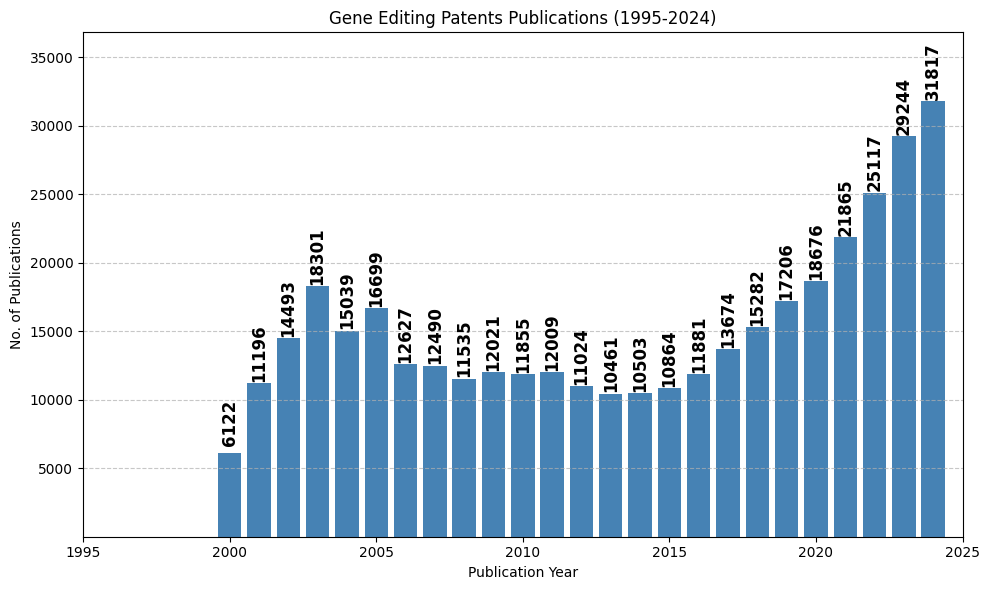

In [237]:
df_all=pd.concat([df,df_unseen,])
#df_all
# Count publications per year and compute cumulative sum
year_counts = df_all['Publication Year'].value_counts().sort_index()
#cumulative_counts = year_counts.cumsum()

# Plot cumulative bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='steelblue')

# Add values inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height+2200 ,                   # Position inside bar
        str(height),                   # Label text
        ha='center', va='center',       # Center align
        color='black', fontsize=12, fontweight='bold',
        rotation=90 
    )

# Axis labels and formatting
plt.xlabel('Publication Year')
plt.ylabel('No. of Publications')
plt.title('Gene Editing Patents Publications (1995-2024)')
plt.xlim(1995, 2025)
plt.ylim(10, year_counts.max() + 5000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [249]:
year_counts.to_csv('gene_years.csv',index='true')
year_counts

2000.0     6122
2001.0    11196
2002.0    14493
2003.0    18301
2004.0    15039
2005.0    16699
2006.0    12627
2007.0    12490
2008.0    11535
2009.0    12021
2010.0    11855
2011.0    12009
2012.0    11024
2013.0    10461
2014.0    10503
2015.0    10864
2016.0    11881
2017.0    13674
2018.0    15282
2019.0    17206
2020.0    18676
2021.0    21865
2022.0    25117
2023.0    29244
2024.0    31817
Name: Publication Year, dtype: int64

In [6]:
df=df[['Publication Number','Title','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]
#df_uns

In [7]:
df_unseen=df_unseen[['Publication Number','Title','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]


In [8]:
df.shape


(274558, 21)

In [9]:
df_unseen.shape

(108043, 21)

In [10]:
print('Total rows with nulls or blanks',len(df.columns[df.isna().all()].tolist() ))
print('Total rows with nulls ',len(df.columns[df.isnull().all()].tolist() ))
na_list = df.columns[df.isna().any()].tolist()

Total rows with nulls or blanks 0
Total rows with nulls  0


In [11]:
#Now delete all the columns for which all rows are having value null
df = df.dropna(axis=1, how='all')
print('data shape=',df.shape)

data shape= (274558, 21)


In [12]:
print('Total rows with nulls or blanks',len(df_unseen.columns[df_unseen.isna().all()].tolist() ))
#print('Total rows with nulls ',len(df.columns[df_unseen.isnull().all()].tolist() ))
na_list = df_unseen.columns[df_unseen.isna().any()].tolist()

Total rows with nulls or blanks 0


In [13]:
#Now delete all the columns for which all rows are having value null
df_unseen = df_unseen.dropna(axis=1, how='all')
print('data shape=',df_unseen.shape)

data shape= (108043, 21)


In [14]:
df.isnull().sum()

Publication Number                                               0
Title                                                        13446
Application Number                                               3
Application Date                                                 3
Publication Date                                               600
DWPI Family Members Dead/Alive                                3264
IPC - Current                                                 6134
Assignee/Applicant                                           30211
Claims Count                                                 45046
Assignee Count                                                   0
Inventor                                                     22369
Publication Country Code                                       600
Application Country/Region                                       3
Related Applications                                        154587
Count of Cited Refs - Patent                                  

In [15]:
df_unseen.isnull().sum()

Publication Number                                              0
Title                                                        1361
Application Number                                              0
Application Date                                                0
Publication Date                                                0
DWPI Family Members Dead/Alive                               2319
IPC - Current                                                2262
Assignee/Applicant                                           4858
Claims Count                                                 6832
Assignee Count                                                  0
Inventor                                                     7350
Publication Country Code                                        0
Application Country/Region                                      0
Related Applications                                        58291
Count of Cited Refs - Patent                                    0
Count of C

In [16]:
df['inventor_list']=df['Inventor'].str.split('|')
# Replace NaN or None values with an empty list, then count elements
df['count_inventor'] = df['inventor_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df

,Publication Number,Title,Application Number,Application Date,Publication Date,DWPI Family Members Dead/Alive,IPC - Current,Assignee/Applicant,Claims Count,Assignee Count,Inventor,Publication Country Code,Application Country/Region,Related Applications,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,Assignee - Original - Country/Region (Original Language),DWPI Family Members,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,inventor_list,count_inventor
0,AR10235A1,A PROCESS FOR THE PREPARATION OF RECOMBINANT H...,AR1997104571A,1997-10-03,2000-06-07,NaN,A61K003818 | C07K0014505 | C12N000518 | C12N00...,CT INGENIERIA GENETICA BIOTECH,NaN,1,NaN,AR,AR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
1,AR10334A1,AN EXPRESSION CASSETTE and A METHOD FOR ALTERI...,AR1997105728A,1997-12-05,2000-06-07,NaN,A01H000500 | A01H000510 | C07K0014425 | C12N00...,"DEKA VASWATI,NL",NaN,1,NaN,AR,AR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
2,AR12850A1,"DERIVATIVES OF POLYKETIDES, AN ISOLATED POLYNU...",AR1998102300A,1998-05-18,2000-11-22,NaN,C12N001509 | C07H001708 | C12N000121 | C12N001...,ABBOTT LAB,NaN,1,NaN,AR,AR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,AR13798A1,"ISOLATED DNA MOLECULE, SELECTED FROM PER5, CAS...",AR1998106271A,1998-12-10,2001-01-10,NaN,C12N001553,DOW AGROSCIENCES LLC,NaN,1,NaN,AR,AR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
4,AR14054A1,A PARTICLE FOR TRASNFECTAR HIGHER EUKARYOTIC C...,AR1998106157A,1998-12-04,2001-01-31,NaN,A61K003576 | A61K004748 | A61K004800,INGELHEIM INTERNAT GMBH UNIVERSTITE LOIS PASTE...,NaN,1,NaN,AR,AR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,ZA201906907B,ANALYTICAL AND THERAPEUTIC METHODS AND COMPOSI...,ZA20196907A,2018-04-26,2020-08-26,WO2018199775A1 Dead | WO2018199775A9 Dead | CA...,NaN,"AUCKLAND UNISERVICES LTD,NZ",NaN,1,MORELAND NICOLE J | YOUNG PAUL GARY | PROFT TH...,ZA,ZA,NaN,0,0,0,NaN,WO2018199775A1 | WO2018199775A9 | CA3061727A1 ...,15.0,135.0,"[MORELAND NICOLE J , YOUNG PAUL GARY , PROFT...",3
18672,ZA201906923A,MATERIALS AND METHODS FOR ENGINEERING CELLS AN...,ZA20196923A,2018-05-11,2020-11-27,NaN,A61K | C07K | C12N,CRISPR THERAPEUTICS AG,NaN,1,JONATHAN ALEXANDER TERRETT | DEMETRIOS KALAITZ...,ZA,ZA,ZA20196923A | 2018-05-11,0,0,0,"CRISPR THERAPEUTICS AG,",NaN,NaN,NaN,"[JONATHAN ALEXANDER TERRETT , DEMETRIOS KALAI...",3
18673,ZA201908541B,BINARY VECTORS AND USES OF SAME,ZA20198541A,2018-06-12,2020-12-17,WO2018229319A1 Dead | ES2693895A1 Dead | EP364...,NaN,"GARCIA ALVAREZ JUAN ANTONIO,ES",NaN,1,PASIN FABIO | GARCÍA ÁLVAREZ JUAN ANTONIO | BE...,ZA,ZA,NaN,0,0,0,NaN,WO2018229319A1 | ES2693895A1 | EP3647427A1 | U...,9.0,135.0,"[PASIN FABIO , GARCÍA ÁLVAREZ JUAN ANTONIO , ...",6
18674,ZA202000152A,MEANS AND METHODS FOR AAV GENE THERAPY IN HUMANS,ZA2020152A,2018-07-10,2020-11-26,NaN,C07K | C12N,uniQure IP B.V.,NaN,1,"NIJMEIJER, Bart Antonius | FERREIRA, Valerie",ZA,ZA,ZA2020152A | 2018-07-10,0,0,0,"uniQure IP B.V.,",NaN,NaN,NaN,"[NIJMEIJER, Bart Antonius , FERREIRA, Valerie]",2


In [245]:
df_unseen['inventor_list']=df_unseen['Inventor'].str.split('|')
# Replace NaN or None values with an empty list, then count elements
df_unseen['count_inventor'] = df_unseen['inventor_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_unseen

,Publication Number,Application Date,Publication Date,Assignee/Applicant,Claims Count,Assignee Count,Inventor Count,Publication Country Code,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,Related Applications,IPC - Current,CPC - Current,Priority Number,Priority Date,Priority Date - DWPI,DWPI Family Members,DWPI Family Members Dead/Alive,Dead/Alive,Opposition (EP),License (EP),Strategic Importance,Probability of Grant,Combined Patent Impact,Assignee - Original - Country/Region,Application Number,Priority Year(s),Application Year,Publication Year,Application Month,Publication Month,Citing Patents,Citing Pat 1st Assignee,Cited Refs - Patent,Cited Pat 1st Assignee,Cited Refs - Non-patent,Cited Non-patents-DOI,Inventor,IPC Class,IPC Subclass,CPC Class,Priority Country/Region,Attorney/Agent,Examiner,Designated States,Assignee - Original,Assignee - Original w/address,Assignee - Original - Country/Region (Original Language),Inventor - Original,Inventor - w/address,Application Country/Region,Priority Country/Region - DWPI,Ultimate Parent,Title,Unnamed: 57,inventor_list,count_inventor
0,AR115364A1,2019-04-24,2021-01-13,"KWS SAAT SE,DE",15.0,1,0,AR,0,0,0,13.0,136.0,NaN,A01H000104 | A01H000500 | A01H000510 | C12N000...,C12N00158255 | A01H0001045 | C12N00090071 | C1...,EP2018169122A,2018-04-24,2018-04-24,EP3560330A1 | WO2019206927A1 | CA3097921A1 | A...,EP3560330A1 Alive | WO2019206927A1 Dead | CA30...,Indeterminate,NaN,NaN,1.0,34.59,1.00,"KWS SAAT SE,DE",AR2019101085A,2018,2019,2021,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A01 | C12,A01H | C12N | C12Q,C12 | A01,EP,NaN,NaN,NaN,KWS SAAT SE,"KWS SAAT SE,DE","KWS SAAT SE,DE",NaN,NaN,AR,EP,KWS SAAT SE,PLANTS WITH IMPROVED DIGESTIBILITY AND MARKER ...,NaN,NaN,0
1,AR115486A1,2019-06-05,2021-01-27,"LIFEEDIT INC.,US",NaN,1,0,AR,0,0,0,24.0,138.0,NaN,C12N0015113 | C12N000922,NaN,US62680845P,2018-06-05,2018-06-05 | 2018-06-05 | 2018-06-05 | 2018-06...,US20190367949A1 | WO2019236566A1 | CA3102840A1...,US20190367949A1 Alive | WO2019236566A1 Dead | ...,Indeterminate,NaN,NaN,1.0,20.27,1.00,"LIFEEDIT INC.,US",AR2019101536A,2018 | 2019,2019,2021,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12,C12N,NaN,US,NaN,NaN,NaN,LIFEEDIT INC.,"LIFEEDIT INC.,US","LIFEEDIT INC.,US",NaN,NaN,AR,US | US | US | US | US | US | US | US | US | E...,LIFEEDIT INC,RNA-GUIDED NUCLEASES AND THEIR ACTIVE FRAGMENT...,NaN,NaN,0
2,AR115505A1,2019-06-07,2021-01-27,"INTELLIA THERAPEUTICS INC.,US",396.0,1,0,AR,0,0,0,20.0,137.0,NaN,C12N0015113 | C12Q000168,NaN,US62682820P,2018-06-08,2018-06-08 | 2018-06-08 | 2019-06-07 | 2020-12...,WO2019237069A1 | CA3102950A1 | AU2019282824A1 ...,WO2019237069A1 Dead | CA3102950A1 Alive | AU20...,Indeterminate,NaN,NaN,1.0,20.27,1.34,"INTELLIA THERAPEUTICS INC.,US",AR2019101567A,2018 | 2019 | 2020,2019,2021,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C12,C12N | C12Q,NaN,US,NaN,NaN,NaN,INTELLIA THERAPEUTICS INC.,"INTELLIA THERAPEUTICS INC.,US","INTELLIA THERAPEUTICS INC.,US",NaN,NaN,AR,US | US | WO | US | PH,REGENERON PHARMACEUTICALS INC.,MODIFIED RNA GUIDES FOR GENE EDITING | GUÍAS M...,NaN,NaN,0
3,AR115647A1,2019-06-28,2021-02-10,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,36.0,1,1,AR,0,0,0,23.0,138.0,NaN,C12N000701 | A61K004800 | A61P002100 | C12N000...,NaN,US62691934P,2018-06-29,2018-06-29 | 2019-06-21 | 2019-06-28 | 2020-12-23,WO2020006458A1 | CA3105216A1 | AU2019295779A1 ...,WO2020006458A1 Dead | CA3105216A1 Indeterminat...,Indeterminate,NaN,NaN,1.0,20.27,1.00,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,AR2019101814A,2018 | 2019 | 2020,2019,2021,6,2,NaN,NaN,NaN,NaN,NaN,NaN,"SAHENK, ZARIFE",C12 | A61,C12N | A61K | A61P,NaN,US,NaN,NaN,NaN,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,"SAHENK, ZARIFE",SAHENK ZARIFE|,AR,US | US | EP | US,NATIONWIDE CHILDREN'S HOSPITAL,PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...,NaN

df=df[['Publication Number','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','inventor_list','Inventor Count','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]
#df_unseen=df_unseen[['Publication Number','Application Number','Application Date','Publication Date','DWPI Family Members Dead/Alive','IPC - Current','Assignee/Applicant','Claims Count','Assignee Count','Inventor','Inventor Count','Publication Country Code','Application Country/Region','Related Applications','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','Assignee - Original - Country/Region (Original Language)','DWPI Family Members','DWPI Count of Family Members','DWPI Count of Family Countries/Regions']]


In [19]:
print('df.shape',df.shape)

df.shape (274558, 23)


In [21]:
print('df_unseen.shape',df_unseen.shape)

df_unseen.shape (108043, 23)


In [22]:
#Now check if there any duplicates present
#duplicate_rows = len(df[df.duplicated()])
#print('Duplicate rows ', duplicate_rows)

In [23]:
#Check percentage of nulls or blanks in columns
df.isnull().sum()*100/len(df)
print(df.isnull().sum()*100/len(df))

Publication Number                                           0.000000
Title                                                        4.897326
Application Number                                           0.001093
Application Date                                             0.001093
Publication Date                                             0.218533
DWPI Family Members Dead/Alive                               1.188820
IPC - Current                                                2.234136
Assignee/Applicant                                          11.003504
Claims Count                                                16.406734
Assignee Count                                               0.000000
Inventor                                                     8.147277
Publication Country Code                                     0.218533
Application Country/Region                                   0.001093
Related Applications                                        56.303950
Count of Cited Refs 

In [24]:
#Check percentage of nulls or blanks in columns
df_unseen.isnull().sum()*100/len(df_unseen)
print(df_unseen.isnull().sum()*100/len(df_unseen))

Publication Number                                           0.000000
Title                                                        1.259684
Application Number                                           0.000000
Application Date                                             0.000000
Publication Date                                             0.000000
DWPI Family Members Dead/Alive                               2.146368
IPC - Current                                                2.093611
Assignee/Applicant                                           4.496358
Claims Count                                                 6.323408
Assignee Count                                               0.000000
Inventor                                                     6.802847
Publication Country Code                                     0.000000
Application Country/Region                                   0.000000
Related Applications                                        53.951667
Count of Cited Refs 

In [25]:
prev_rows=len(df)

In [26]:
df= df[df['IPC - Current'].notna()]
df= df[df['Claims Count'].notna()]
df= df[df['Assignee/Applicant'].notna()]
df= df[df['Inventor'].notna()]
df= df[df['DWPI Count of Family Members'].notna()]
df= df[df['DWPI Count of Family Countries/Regions'].notna()]

In [27]:
after_rows=len(df)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(df.shape)

Total % of rows deleted: 28.16
(197256, 23)


In [28]:
# Convert columns to datetime
df['Application Date'] = pd.to_datetime(df['Application Date'])
df['Publication Date'] = pd.to_datetime(df['Publication Date'])
# Calculate grant lag in days
df['grant_lag_days'] = (df['Publication Date'] - df['Application Date']).dt.days

In [29]:
prev_rows=len(df_unseen)

In [30]:
df_unseen= df_unseen[df_unseen['IPC - Current'].notna()] 
df_unseen= df_unseen[df_unseen['Claims Count'].notna()]
df_unseen= df_unseen[df_unseen['Inventor'].notna()]
df_unseen= df_unseen[df_unseen['DWPI Count of Family Members'].notna()]
df_unseen= df_unseen[df_unseen['DWPI Count of Family Countries/Regions'].notna()]
df_unseen= df_unseen[df_unseen['Assignee/Applicant'].notna()]
#df_unseen= df_unseen[df_unseen['Optimized Assignee'].notna()]
#df_unseen= df_unseen[df_unseen['Ultimate Parent'].notna()]
#df_unseen= df_unseen[df_unseen['Inventor'].notna()]
#df_unseen= df_unseen[df_unseen['Claims Count'].notna()]


In [31]:
after_rows=len(df_unseen)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(df_unseen.shape)

Total % of rows deleted: 14.86
(91990, 23)


In [32]:
# Convert columns to datetime
df_unseen['Application Date'] = pd.to_datetime(df_unseen['Application Date'])
df_unseen['Publication Date'] = pd.to_datetime(df_unseen['Publication Date'])
# Calculate grant lag in days
df_unseen['grant_lag_days'] = (df_unseen['Publication Date'] - df_unseen['Application Date']).dt.days

In [33]:
# Check if there is any more na
(df.isnull().sum()*100)/len(df)

Publication Number                                           0.000000
Title                                                        0.008618
Application Number                                           0.000000
Application Date                                             0.000000
Publication Date                                             0.261082
DWPI Family Members Dead/Alive                               0.261082
IPC - Current                                                0.000000
Assignee/Applicant                                           0.000000
Claims Count                                                 0.000000
Assignee Count                                               0.000000
Inventor                                                     0.000000
Publication Country Code                                     0.261082
Application Country/Region                                   0.000000
Related Applications                                        53.969968
Count of Cited Refs 

In [34]:
# Convert the column into counts (count non-NaN values separated by '|', and 0 for NaN)
df['RelatedApplicationCount'] = df['Related Applications'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)

print(df)

      Publication Number                                              Title  \
17          AU199875533A  Process for obtaining transgenic plants which ...   
20          AU199887801A  A method of transducing mammalian cells, and p...   
99          AU199912847A  Compositions and methods for treating lysosoma...   
102         AU199918500A  Somatic gene therapy to cells associated with ...   
105         AU199925934A                        Tumor necrosis factor-gamma   
...                  ...                                                ...   
18630     WO2020264350A1  METHODS AND COMPOSITIONS FOR TREATING SMITH-MA...   
18631     WO2020264353A1  SYNTHETIC GENES FOR THE TREATMENT OF PROPIONIC...   
18632     WO2020264400A2  COMPOSITIONS AND METHODS FOR SYNTHESIS OF TERP...   
18633     WO2020264488A1  COMPOSITIONS AND METHODS FOR TREATING ANEMIA |...   
18634     WO2020264532A1  METHODS AND COMPOSITIONS FOR TREATING THALASSE...   

      Application Number Application Date Publicati

In [35]:
df_unseen['RelatedApplicationCount'] = df_unseen['Related Applications'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)

print(df_unseen)

     Publication Number                                              Title  \
3            AR115647A1  PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...   
4            AR115693A1  COMPOUNDS AND COMPOSITIONS TO TREAT CONDITIONS...   
5            AR115858A1  TREATMENT OF MUCOPOLYSACCHARIDOSIS IVA | TRATA...   
10           AR116552A1  IMPLANTABLE DEVICES FOR CELL THERAPY AND RELAT...   
11           AR116569A1  GENE THERAPY TO TREAT PROPIONIC ACIDEMIA | TER...   
...                 ...                                                ...   
2629     WO2024263991A2  METHODS AND COMPOSITIONS FOR INTEGRATION DEFIC...   
2630     WO2024264004A2  T-CELL MODULATORY POLYPEPTIDES AND METHODS OF ...   
2631     WO2024264035A2  COMPOSITIONS AND METHODS OF GENERATING ENDOGEN...   
2632     WO2024264054A2  SYSTEM AND METHOD FOR ENHANCING VISUALIZATION ...   
2633     WO2024264073A2  CIRCADIAN PROBIOTIC SYSTEMS | SYSTÈMES PROBIOT...   

     Application Number Application Date Publication Date  \
3 

In [36]:

# Create a new column for IPC Subclasses (split the IPCs and remove duplicates)
df['IPC Subclass'] = df['IPC - Current'].apply(lambda x: sorted(set(str(x).split('|'))) if pd.notna(x) and x != '' else [])

# Create a new column for IPC Subclass Counts (count the occurrences of each IPC subclass)
df['IPC Subclass Count'] = df['IPC - Current'].apply(lambda x: {subclass: str(x).split('|').count(subclass) for subclass in set(str(x).split('|'))} if pd.notna(x) and x != '' else {})

print(df)


      Publication Number                                              Title  \
17          AU199875533A  Process for obtaining transgenic plants which ...   
20          AU199887801A  A method of transducing mammalian cells, and p...   
99          AU199912847A  Compositions and methods for treating lysosoma...   
102         AU199918500A  Somatic gene therapy to cells associated with ...   
105         AU199925934A                        Tumor necrosis factor-gamma   
...                  ...                                                ...   
18630     WO2020264350A1  METHODS AND COMPOSITIONS FOR TREATING SMITH-MA...   
18631     WO2020264353A1  SYNTHETIC GENES FOR THE TREATMENT OF PROPIONIC...   
18632     WO2020264400A2  COMPOSITIONS AND METHODS FOR SYNTHESIS OF TERP...   
18633     WO2020264488A1  COMPOSITIONS AND METHODS FOR TREATING ANEMIA |...   
18634     WO2020264532A1  METHODS AND COMPOSITIONS FOR TREATING THALASSE...   

      Application Number Application Date Publicati

In [37]:
# Create a new column for IPC Subclasses (split the IPCs and remove duplicates)
df_unseen['IPC Subclass'] = df_unseen['IPC - Current'].apply(lambda x: sorted(set(str(x).split('|'))) if pd.notna(x) and x != '' else [])

# Create a new column for IPC Subclass Counts (count the occurrences of each IPC subclass)
df_unseen['IPC Subclass Count'] = df_unseen['IPC - Current'].apply(lambda x: {subclass: str(x).split('|').count(subclass) for subclass in set(str(x).split('|'))} if pd.notna(x) and x != '' else {})

print(df_unseen)

     Publication Number                                              Title  \
3            AR115647A1  PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...   
4            AR115693A1  COMPOUNDS AND COMPOSITIONS TO TREAT CONDITIONS...   
5            AR115858A1  TREATMENT OF MUCOPOLYSACCHARIDOSIS IVA | TRATA...   
10           AR116552A1  IMPLANTABLE DEVICES FOR CELL THERAPY AND RELAT...   
11           AR116569A1  GENE THERAPY TO TREAT PROPIONIC ACIDEMIA | TER...   
...                 ...                                                ...   
2629     WO2024263991A2  METHODS AND COMPOSITIONS FOR INTEGRATION DEFIC...   
2630     WO2024264004A2  T-CELL MODULATORY POLYPEPTIDES AND METHODS OF ...   
2631     WO2024264035A2  COMPOSITIONS AND METHODS OF GENERATING ENDOGEN...   
2632     WO2024264054A2  SYSTEM AND METHOD FOR ENHANCING VISUALIZATION ...   
2633     WO2024264073A2  CIRCADIAN PROBIOTIC SYSTEMS | SYSTÈMES PROBIOT...   

     Application Number Application Date Publication Date  \
3 

In [38]:
# Convert the column into counts (count the number of values separated by '|', 0 for NaN or empty strings)
df['IPC - Current Count'] = df['IPC - Current'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) and x != '' else 0)

print(df)

      Publication Number                                              Title  \
17          AU199875533A  Process for obtaining transgenic plants which ...   
20          AU199887801A  A method of transducing mammalian cells, and p...   
99          AU199912847A  Compositions and methods for treating lysosoma...   
102         AU199918500A  Somatic gene therapy to cells associated with ...   
105         AU199925934A                        Tumor necrosis factor-gamma   
...                  ...                                                ...   
18630     WO2020264350A1  METHODS AND COMPOSITIONS FOR TREATING SMITH-MA...   
18631     WO2020264353A1  SYNTHETIC GENES FOR THE TREATMENT OF PROPIONIC...   
18632     WO2020264400A2  COMPOSITIONS AND METHODS FOR SYNTHESIS OF TERP...   
18633     WO2020264488A1  COMPOSITIONS AND METHODS FOR TREATING ANEMIA |...   
18634     WO2020264532A1  METHODS AND COMPOSITIONS FOR TREATING THALASSE...   

      Application Number Application Date Publicati

In [39]:
# Convert the column into counts (count the number of values separated by '|', 0 for NaN or empty strings)
df_unseen['IPC - Current Count'] = df_unseen['IPC - Current'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) and x != '' else 0)

print(df_unseen)

     Publication Number                                              Title  \
3            AR115647A1  PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...   
4            AR115693A1  COMPOUNDS AND COMPOSITIONS TO TREAT CONDITIONS...   
5            AR115858A1  TREATMENT OF MUCOPOLYSACCHARIDOSIS IVA | TRATA...   
10           AR116552A1  IMPLANTABLE DEVICES FOR CELL THERAPY AND RELAT...   
11           AR116569A1  GENE THERAPY TO TREAT PROPIONIC ACIDEMIA | TER...   
...                 ...                                                ...   
2629     WO2024263991A2  METHODS AND COMPOSITIONS FOR INTEGRATION DEFIC...   
2630     WO2024264004A2  T-CELL MODULATORY POLYPEPTIDES AND METHODS OF ...   
2631     WO2024264035A2  COMPOSITIONS AND METHODS OF GENERATING ENDOGEN...   
2632     WO2024264054A2  SYSTEM AND METHOD FOR ENHANCING VISUALIZATION ...   
2633     WO2024264073A2  CIRCADIAN PROBIOTIC SYSTEMS | SYSTÈMES PROBIOT...   

     Application Number Application Date Publication Date  \
3 

In [40]:
# Extract the 4-digit IPC Subclass (first 4 characters)
df['IPC Subclass 4-digit'] = df['IPC - Current'].apply(lambda x: sorted(set([subclass[:4] for subclass in str(x).split('|')])) if pd.notna(x) and x != '' else [])

# Create a column for the counts of each 4-digit IPC Subclass
df['IPC Subclass Count'] = df['IPC - Current'].apply(
    lambda x: {subclass[:4]: [subclass[:4] for subclass in str(x).split('|')].count(subclass[:4]) 
               for subclass in set([subclass[:4] for subclass in str(x).split('|')])} 
    if pd.notna(x) and x != '' else {}
)

# Count the number of subclasses in each row
df['Sub Class Count'] = df['IPC Subclass 4-digit'].apply(lambda x: len(x))

print(df)
df['IPC Subclass 4-digit'].value_counts()
print(df)

      Publication Number                                              Title  \
17          AU199875533A  Process for obtaining transgenic plants which ...   
20          AU199887801A  A method of transducing mammalian cells, and p...   
99          AU199912847A  Compositions and methods for treating lysosoma...   
102         AU199918500A  Somatic gene therapy to cells associated with ...   
105         AU199925934A                        Tumor necrosis factor-gamma   
...                  ...                                                ...   
18630     WO2020264350A1  METHODS AND COMPOSITIONS FOR TREATING SMITH-MA...   
18631     WO2020264353A1  SYNTHETIC GENES FOR THE TREATMENT OF PROPIONIC...   
18632     WO2020264400A2  COMPOSITIONS AND METHODS FOR SYNTHESIS OF TERP...   
18633     WO2020264488A1  COMPOSITIONS AND METHODS FOR TREATING ANEMIA |...   
18634     WO2020264532A1  METHODS AND COMPOSITIONS FOR TREATING THALASSE...   

      Application Number Application Date Publicati

In [41]:
# Extract the 4-digit IPC Subclass (first 4 characters)
df_unseen['IPC Subclass 4-digit'] = df_unseen['IPC - Current'].apply(lambda x: sorted(set([subclass[:4] for subclass in str(x).split('|')])) if pd.notna(x) and x != '' else [])

# Create a column for the counts of each 4-digit IPC Subclass
df_unseen['IPC Subclass Count'] = df_unseen['IPC - Current'].apply(
    lambda x: {subclass[:4]: [subclass[:4] for subclass in str(x).split('|')].count(subclass[:4]) 
               for subclass in set([subclass[:4] for subclass in str(x).split('|')])} 
    if pd.notna(x) and x != '' else {}
)

# Count the number of subclasses in each row
df_unseen['Sub Class Count'] = df_unseen['IPC Subclass 4-digit'].apply(lambda x: len(x))

print(df_unseen)
df_unseen['IPC Subclass 4-digit'].value_counts()
print(df_unseen)

     Publication Number                                              Title  \
3            AR115647A1  PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...   
4            AR115693A1  COMPOUNDS AND COMPOSITIONS TO TREAT CONDITIONS...   
5            AR115858A1  TREATMENT OF MUCOPOLYSACCHARIDOSIS IVA | TRATA...   
10           AR116552A1  IMPLANTABLE DEVICES FOR CELL THERAPY AND RELAT...   
11           AR116569A1  GENE THERAPY TO TREAT PROPIONIC ACIDEMIA | TER...   
...                 ...                                                ...   
2629     WO2024263991A2  METHODS AND COMPOSITIONS FOR INTEGRATION DEFIC...   
2630     WO2024264004A2  T-CELL MODULATORY POLYPEPTIDES AND METHODS OF ...   
2631     WO2024264035A2  COMPOSITIONS AND METHODS OF GENERATING ENDOGEN...   
2632     WO2024264054A2  SYSTEM AND METHOD FOR ENHANCING VISUALIZATION ...   
2633     WO2024264073A2  CIRCADIAN PROBIOTIC SYSTEMS | SYSTÈMES PROBIOT...   

     Application Number Application Date Publication Date  \
3 

In [42]:
# Check if there is any more na
(df.isnull().sum()*100)/len(df)

Publication Number                                           0.000000
Title                                                        0.008618
Application Number                                           0.000000
Application Date                                             0.000000
Publication Date                                             0.261082
DWPI Family Members Dead/Alive                               0.261082
IPC - Current                                                0.000000
Assignee/Applicant                                           0.000000
Claims Count                                                 0.000000
Assignee Count                                               0.000000
Inventor                                                     0.000000
Publication Country Code                                     0.261082
Application Country/Region                                   0.000000
Related Applications                                        53.969968
Count of Cited Refs 

In [43]:
#df.nunique().sort_values()
# Check if there is any more na
(df_unseen.isnull().sum()*100)/len(df_unseen)

Publication Number                                           0.000000
Title                                                        0.041309
Application Number                                           0.000000
Application Date                                             0.000000
Publication Date                                             0.000000
DWPI Family Members Dead/Alive                               0.000000
IPC - Current                                                0.000000
Assignee/Applicant                                           0.000000
Claims Count                                                 0.000000
Assignee Count                                               0.000000
Inventor                                                     0.000000
Publication Country Code                                     0.000000
Application Country/Region                                   0.000000
Related Applications                                        52.932927
Count of Cited Refs 

In [44]:
Field_list_sort=['Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent','Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','IPC - Current Count','RelatedApplicationCount']
df['High Quality'] = 0  # Initialize all rows with 0
for i in Field_list_sort:
# Step 1: Sort the DataFrame based on 'Claims Count' in descending order
 df = df.sort_values(by=i, ascending=False).reset_index(drop=True)

# Step 2: Calculate the number of rows representing the top 5%
 top_5_percent_index = int(len(df) * 0.05)

# Step 3: Set 'High Quality' to 0 for all rows and 1 for the top 5%
 df.loc[:top_5_percent_index, 'High Quality'] = 1
    



print(df)


       Publication Number                                              Title  \
0             US7411051B2                  Antibodies to HDPPA04 polypeptide   
1             US7368531B2                            Human secreted proteins   
2         US20080103090A1                            Human Secreted Proteins   
3         US20130203164A1                            Human Secreted Proteins   
4         US20100105134A1  NUCLEIC ACID COMPOUNDS FOR INHIBITING GENE EXP...   
...                   ...                                                ...   
197251        EP1112283A1  STIMULATION OF ANGIOGENESIS VIA ENHANCED ENDOT...   
197252     WO2002071927A2  DIAGNOSIS AND TREATMENT OF SKELETAL DEGENERATI...   
197253     WO2000031275A1  RECOMBINANT LYSOPHOSPHATIDIC ACID PHOSPHATASE ...   
197254        EP1557469B1  METHOD OF EXPRESSING PROTEIN HAVING UNNATURAL ...   
197255    US20140309613A1  METHODS AND PHARMACEUTICAL COMPOSITIONS FOR TH...   

       Application Number Application D

In [45]:
df.head()

,Publication Number,Title,Application Number,Application Date,Publication Date,DWPI Family Members Dead/Alive,IPC - Current,Assignee/Applicant,Claims Count,Assignee Count,Inventor,Publication Country Code,Application Country/Region,Related Applications,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,Assignee - Original - Country/Region (Original Language),DWPI Family Members,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,inventor_list,count_inventor,grant_lag_days,RelatedApplicationCount,IPC Subclass,IPC Subclass Count,IPC - Current Count,IPC Subclass 4-digit,Sub Class Count,High Quality
0,US7411051B2,Antibodies to HDPPA04 polypeptide,US20041793A,2004-12-02,2008-08-12,US20070041963A1 Dead | US7411051B2 Dead,C07K001600,"Human Genome Sciences Inc.,Rockville,MD,US",31.0,1,"Rosen, Craig A. | Ruben, Steven M.",US,US,US20041793A | 2004-12-02 | US2001277340P | 200...,1,0,161,"Human Genome Sciences Inc.,US",US20070041963A1 | US7411051B2,2.0,1.0,"[Rosen, Craig A. , Ruben, Steven M.]",2,1349.0,1818,[C07K001600],{'C07K': 1},1,[C07K],1,1
1,US7368531B2,Human secreted proteins,US2002100683A,2002-03-19,2008-05-06,US20070037206A1 Dead | US7368531B2 Dead,C07K000100,"Human Genome Sciences Inc.,Rockville,MD,US",40.0,1,"Rosen, Craig A. | Ruben, Steven M.",US,US,US2002100683A | 2002-03-19 | US2002358714P | 2...,0,2,267,"Human Genome Sciences Inc.,US",US20070037206A1 | US7368531B2,2.0,1.0,"[Rosen, Craig A. , Ruben, Steven M.]",2,2240.0,1414,[C07K000100],{'C07K': 1},1,[C07K],1,1
2,US20080103090A1,Human Secreted Proteins,US2007687755A,2007-03-19,2008-05-01,US20080103090A1 Dead,A61K003802 | C07H002100 | C07K000200 | C07K001...,"Human Genome Sciences Inc.,Rockville,MD,US",24.0,1,"Rosen, Craig, A. | Ruben, Steven, M.",US,US,US2001277340P | 2001-03-21 | US2001306171P | 2...,1,0,57,"Human Genome Sciences Inc.,US",US20080103090A1,1.0,1.0,"[Rosen, Craig, A. , Ruben, Steven, M.]",2,409.0,800,"[ C07H002100 , C07K000200 , C07K001618 , C1...","{' C07': 3, ' G01': 2, ' C12': 4, 'A61K': 1}",10,"[ C07, C12, G01, A61K]",4,1
3,US20130203164A1,Human Secreted Proteins,US13848789A,2013-03-22,2013-08-08,WO2000055199A1 Dead | AU200032493A Dead | EP11...,C07K001447 | C07K001618,"Human Genome Sciences Inc.,Rockville,MD,US | R...",14.0,3,"ROSEN, Craig A. | Ruben, Steven M.",US,US,US2001278650P | 2001-03-27 | US1999167061P | 1...,0,0,12,"Human Genome Sciences Inc.,US | ROSEN Craig A....",WO2000055199A1 | AU200032493A | EP1169344A1 | ...,5.0,83.0,"[ROSEN, Craig A. , Ruben, Steven M.]",2,139.0,768,"[ C07K001618, C07K001447 ]","{' C07': 1, 'C07K': 1}",2,"[ C07, C07K]",2,1
4,US20100105134A1,NUCLEIC ACID COMPOUNDS FOR INHIBITING GENE EXP...,US2009552082A,2009-09-01,2010-04-29,US20100105134A1 Dead,C12N0005071 | C07H002102 | C12N000500,"MDRNA Inc.,Bothell,WA,US",22.0,1,"Quay, Steven C. | McSwiggen, James | Vaish, Na...",US,US,US2007934930P | 2007-03-16 | US2007934940P | 2...,13,0,51,"MDRNA Inc.,US",US20100105134A1,1.0,1.0,"[Quay, Steven C. , McSwiggen, James , Vaish,...",4,240.0,694,"[ C07H002102 , C12N000500, C12N0005071 ]","{'C12N': 1, ' C12': 1, ' C07': 1}",3,"[ C07, C12, C12N]",3,1


In [46]:
#df.to_csv('GenePreprocessed1820.csv', index=False) #after sort operation on numerical fields

In [47]:
#droping non numeric values IPC - Current Count
#df.drop(['Application Number','Front Page Drawing', 'Front Page Image'],axis=1, inplace=True)
feature_names=['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count','High Quality']#
training_features = df[feature_names]

#df=df[]

#Now delete all the columns for which all rows are having value null
df[feature_names] = df[feature_names].dropna(axis=1, how='all')
print('data shape=',df[feature_names].shape)
# Check if there is any more na
(df.isnull().sum()*100)/len(df)

data shape= (197256, 13)


Publication Number                                           0.000000
Title                                                        0.008618
Application Number                                           0.000000
Application Date                                             0.000000
Publication Date                                             0.261082
DWPI Family Members Dead/Alive                               0.261082
IPC - Current                                                0.000000
Assignee/Applicant                                           0.000000
Claims Count                                                 0.000000
Assignee Count                                               0.000000
Inventor                                                     0.000000
Publication Country Code                                     0.261082
Application Country/Region                                   0.000000
Related Applications                                        53.969968
Count of Cited Refs 

In [48]:
df[feature_names].head()

,grant_lag_days,Claims Count,Assignee Count,count_inventor,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,RelatedApplicationCount,IPC - Current Count,Sub Class Count,High Quality
0,1349.0,31.0,1,2,1,0,161,2.0,1.0,1818,1,1,1
1,2240.0,40.0,1,2,0,2,267,2.0,1.0,1414,1,1,1
2,409.0,24.0,1,2,1,0,57,1.0,1.0,800,10,4,1
3,139.0,14.0,3,2,0,0,12,5.0,83.0,768,2,2,1
4,240.0,22.0,1,4,13,0,51,1.0,1.0,694,3,3,1


In [79]:
#df[feature_names].to_csv('QuantPreprocessed_numbers1820.csv', index=False) #for assesment file
df_num=df[feature_names]
#df = df.dropna()
df= df.fillna(df.mean(numeric_only=True))

In [81]:
X=df[['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']]#
y=df['High Quality']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#X_test

In [82]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [83]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (157804, 12)
y_train Shape: (157804,)
X_val Shape: (39452, 12)
y_val Shape: (39452,)


Handling Data Imbalance using Synthetic Minority Over-sampling Technique (SMOTE)

In [84]:
#smt = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

Feature Scaling using SandardScaler - Training Set

In [85]:
from sklearn.preprocessing import StandardScaler

Feature Scaling using SandardScaler - Unseen Test Set

1. Logistic Regression with PCA and Hyperparameter Tuning

pca = PCA()
pca_components = pca.fit_transform(X_train)
pca_components

sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [86]:
def outlier_handling(dataframe):
    """
    Applies outlier handling transformations to the values in the given DataFrame.

    Parameters:
    - dataframe (DataFrame): The DataFrame containing the values to be transformed.

    Returns:
    - transformed_values (list): A list containing the transformed values based on the specified conditions.
    """

    transformed_values = []
    for value in dataframe:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values


In [87]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [88]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [89]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=7,svd_solver='full')
smote = SMOTE(random_state=2)
lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)

In [90]:
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    lr
)

In [91]:
# Define hyperparameters grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
}

In [92]:
# Instantiate GridSearchCV
lr_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1,error_score='raise')

In [93]:
# Fit the model using GridSearchCV
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=7, svd_solver='full')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           tol=0.001))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [94]:
# Get the best parameters and estimator
lr_best_params = lr_grid_search.best_params_
print("lr_best_params ", lr_best_params)
lr_best_estimator = lr_grid_search.best_estimator_
print("lr_best_estimator ", lr_best_estimator)

lr_best_params  {'logisticregression__C': 10, 'logisticregression__solver': 'liblinear'}
lr_best_estimator  Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('smote', SMOTE(random_state=2)),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7, svd_solver='full')),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear', tol=0.001))])


In [95]:
# Predict values on the training set
y_train_pred = lr_grid_search.predict(X_train)

In [96]:
# Predict values on the validation set
y_val_pred = lr_grid_search.predict(X_val)

In [97]:
# Metrics of the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[88929 14134]
 [10404 44337]]


,Metric,Value
0,Accuracy,0.8445
1,Sensitivity,0.8099
2,Specificity,0.8629
3,Precision,0.7583
4,False Positive Rate,0.1371
5,True Positive Rate,0.8099


In [98]:
# Metrics of the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[22135  3657]
 [ 2646 11014]]


,Metric,Value
0,Accuracy,0.8402
1,Sensitivity,0.8063
2,Specificity,0.8582
3,Precision,0.7507
4,False Positive Rate,0.1418
5,True Positive Rate,0.8063


In [99]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88     25792
           1       0.75      0.81      0.78     13660

    accuracy                           0.84     39452
   macro avg       0.82      0.83      0.83     39452
weighted avg       0.84      0.84      0.84     39452



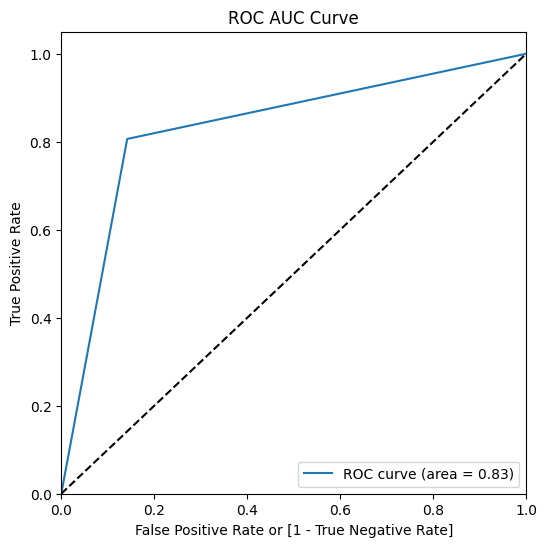

In [100]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

GNB Model with PCA and GridSearchCV

In [101]:
gnb = GaussianNB()
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=7,svd_solver='full')
smote = SMOTE(random_state=2)
#lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=7)
smote = SMOTE(random_state=2)

In [102]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    gnb
)

In [103]:
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Setup GridSearchCV
gnb_grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
gnb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]})

In [104]:
# Get the best parameters and the best score
best_params = gnb_grid_search.best_params_
best_score = gnb_grid_search.best_score_
print("best_params",best_params)
print("best_score",best_score)
# Predict on train set using the best model
y_train_pred = gnb_grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = gnb_grid_search.predict(X_val)

best_params {'var_smoothing': 1e-09}
best_score 0.8579884103164496


In [105]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[100235   2828]
 [ 19596  35145]]


,Metric,Value
0,Accuracy,0.8579
1,Sensitivity,0.6420
2,Specificity,0.9726
3,Precision,0.9255
4,False Positive Rate,0.0274
5,True Positive Rate,0.6420


In [106]:
# Metrics on the test set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[25053   739]
 [ 4879  8781]]


,Metric,Value
0,Accuracy,0.8576
1,Sensitivity,0.6428
2,Specificity,0.9713
3,Precision,0.9224
4,False Positive Rate,0.0287
5,True Positive Rate,0.6428


In [107]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     25792
           1       0.92      0.64      0.76     13660

    accuracy                           0.86     39452
   macro avg       0.88      0.81      0.83     39452
weighted avg       0.87      0.86      0.85     39452



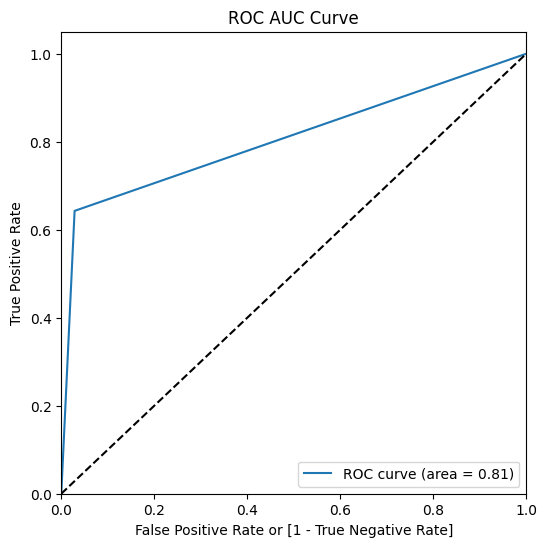

In [108]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Decision Tree with PCA and GridSearchCV

In [160]:
dt = DecisionTreeClassifier(random_state=42)

In [161]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pca = PCA(n_components=7)
smote = SMOTE(random_state=2)

In [162]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    dt
)

In [163]:
# Create the parameter grid based on the results of random search 
params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
}

In [164]:
# Instantiate the grid search model
dt_grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [165]:
# Fit the GridSearchCV
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10, 20,
                                                                      50,
                                                                      100]},
             scoring='accuracy', verbose=1)

In [166]:
# Get the best parameters and the best score
best_params = dt_grid_search.best_params_
best_score = dt_grid_search.best_score_
print("best_params",best_params)
print("best_score",best_score)
# Predict on train set using the best model
y_train_pred = dt_grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = dt_grid_search.predict(X_val)

best_params {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 10}
best_score 0.8849078809261837


In [167]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[96691  6372]
 [ 5230 49511]]


,Metric,Value
0,Accuracy,0.9265
1,Sensitivity,0.9045
2,Specificity,0.9382
3,Precision,0.8860
4,False Positive Rate,0.0618
5,True Positive Rate,0.9045


In [168]:
# Metrics on the test set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[23109  2683]
 [ 1922 11738]]


,Metric,Value
0,Accuracy,0.8833
1,Sensitivity,0.8593
2,Specificity,0.8960
3,Precision,0.8140
4,False Positive Rate,0.1040
5,True Positive Rate,0.8593


In [169]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     25792
           1       0.81      0.86      0.84     13660

    accuracy                           0.88     39452
   macro avg       0.87      0.88      0.87     39452
weighted avg       0.89      0.88      0.88     39452



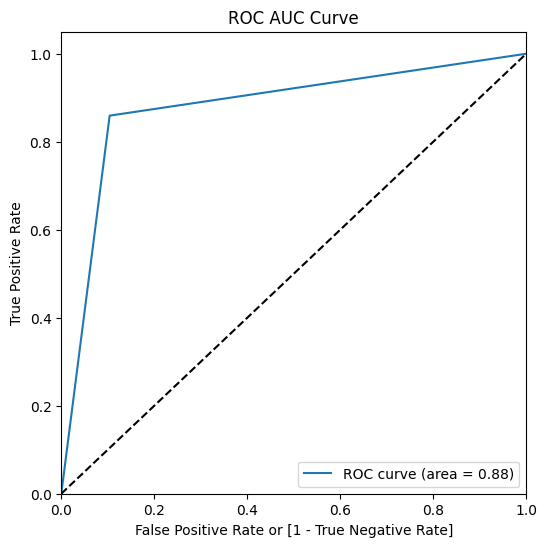

In [170]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model 3. Random Forest Classifier with PCA and Hyperparameter Tuning

In [172]:
rf = RandomForestClassifier(random_state=42)

In [173]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    rf
)

In [1]:
# Define the hyperparameters grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50],  
    'randomforestclassifier__max_depth': [5, 10],       
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

In [175]:
rf_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [176]:
%%time
# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 48.2 s
Wall time: 3min 46s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50]},
             scoring='accuracy', verbose=1)

In [177]:
# Get the best parameters
best_params = rf_grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = rf_grid_search.best_estimator_

# Predict on train set using the best model
y_train_pred = rf_grid_search.predict(X_train)

# Predict on train set using the validation model
y_val_pred = rf_grid_search.predict(X_val)

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}


In [178]:
## Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[96940  6123]
 [ 9984 44757]]


,Metric,Value
0,Accuracy,0.8979
1,Sensitivity,0.8176
2,Specificity,0.9406
3,Precision,0.8797
4,False Positive Rate,0.0594
5,True Positive Rate,0.8176


In [179]:
# Metrics on the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[23977  1815]
 [ 2554 11106]]


,Metric,Value
0,Accuracy,0.8893
1,Sensitivity,0.8130
2,Specificity,0.9296
3,Precision,0.8595
4,False Positive Rate,0.0704
5,True Positive Rate,0.8130


In [180]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     25792
           1       0.86      0.81      0.84     13660

    accuracy                           0.89     39452
   macro avg       0.88      0.87      0.88     39452
weighted avg       0.89      0.89      0.89     39452



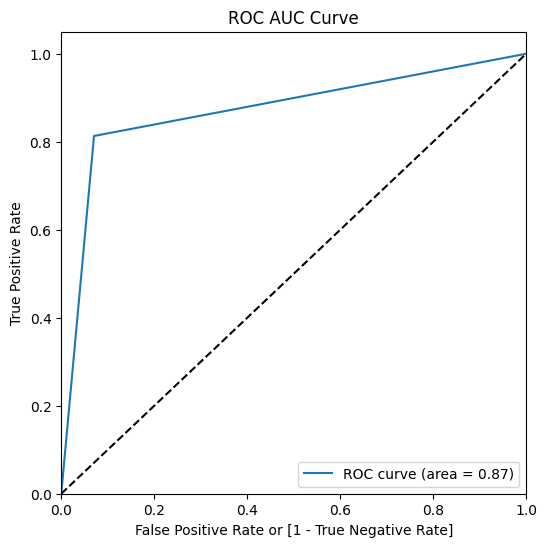

In [181]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model 4. AdaBoost Classifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define a base estimator (DecisionTreeClassifier with max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define AdaBoost with the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_estimator)

# Define a pipeline
pipeline = imPipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation for missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('pca', PCA(n_components=7)),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # SMOTE for class imbalance
    ('adaboost', adaboost)  # AdaBoost classifier
])

# Define the hyperparameter grid to search
param_grid = {
    # Hyperparameters for AdaBoost
    'adaboost__n_estimators': [50, 100, 200],  # Number of estimators (weak classifiers)
    'adaboost__learning_rate': [0.01, 0.1, 1],  # Learning rate
    'adaboost__base_estimator__max_depth': [1, 3, 5],  # Depth of the base estimator (DecisionTree)
    
    # Hyperparameters for SMOTE (optional)
    'smote__sampling_strategy': [0.5, 1.0],  # How much to oversample the minority class
}

# Set up GridSearchCV
ada_grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('adaboost',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))]),
             n_jobs=-1,
             param_grid={'adaboost__base_estimator__max_depth': [1, 3, 5],
                         'adaboost__learning_rate': [0.01, 0.1, 1],
                         'adaboost__n_estimators': [50, 100, 200],
                         'smote__sampling_strategy': [0.5, 1.0]},
             verbose=2)

In [115]:
# Predict on train set using the best model
y_train_pred = ada_grid_search.predict(X_train)

# Predict on train set using the validation model
y_val_pred = ada_grid_search.predict(X_val)

In [116]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[97741  5322]
 [ 7399 47342]]


,Metric,Value
0,Accuracy,0.9194
1,Sensitivity,0.8648
2,Specificity,0.9484
3,Precision,0.8989
4,False Positive Rate,0.0516
5,True Positive Rate,0.8648


In [119]:
# Metrics on the validation set
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[24093  1699]
 [ 1981 11679]]


,Metric,Value
0,Accuracy,0.9067
1,Sensitivity,0.8550
2,Specificity,0.9341
3,Precision,0.8730
4,False Positive Rate,0.0659
5,True Positive Rate,0.8550


In [120]:
# Generate a classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     25792
           1       0.87      0.85      0.86     13660

    accuracy                           0.91     39452
   macro avg       0.90      0.89      0.90     39452
weighted avg       0.91      0.91      0.91     39452



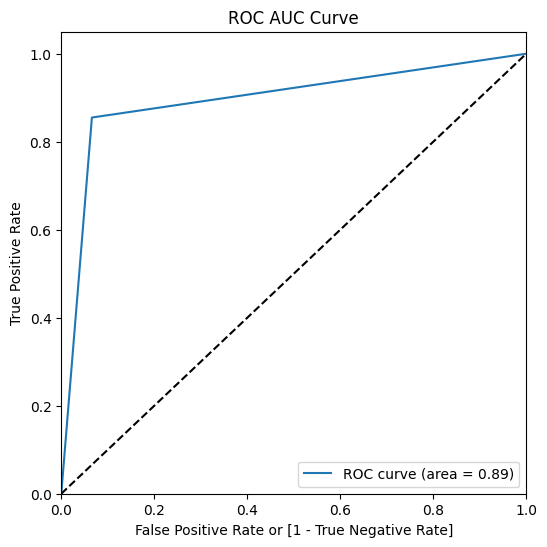

In [121]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

In [122]:
#out file prepration
#Read quantum computing patent data and convert into data frame
#df_unseen=pd.read_csv("quant_csv2123.csv",skiprows=1)
df = df.dropna()
df_unseen

,Publication Number,Title,Application Number,Application Date,Publication Date,DWPI Family Members Dead/Alive,IPC - Current,Assignee/Applicant,Claims Count,Assignee Count,Inventor,Publication Country Code,Application Country/Region,Related Applications,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,Assignee - Original - Country/Region (Original Language),DWPI Family Members,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,inventor_list,count_inventor,grant_lag_days,RelatedApplicationCount,IPC Subclass,IPC Subclass Count,IPC - Current Count,IPC Subclass 4-digit,Sub Class Count
3,AR115647A1,PRODUCTS AND METHODS WITH RECOMBINANT ADENO-AS...,AR2019101814A,2019-06-28,2021-02-10,WO2020006458A1 Dead | CA3105216A1 Indeterminat...,C12N000701 | A61K004800 | A61P002100 | C12N000...,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,36.0,1,"SAHENK, ZARIFE",AR,AR,NaN,0,0,0,RESEARCH INSTITUTE AT NATIONWIDE CHILDREN’S HO...,WO2020006458A1 | CA3105216A1 | AU2019295779A1 ...,23.0,138.0,"[SAHENK, ZARIFE]",1,593,0,"[ A61K004800 , A61P002100 , C12N000964 , C1...","{'C12N': 1, ' A61': 2, ' C12': 2}",5,"[ A61, C12, C12N]",3
4,AR115693A1,COMPOUNDS AND COMPOSITIONS TO TREAT CONDITIONS...,AR2019101884A,2019-07-03,2021-02-17,WO2020010092A1 Dead | US20200172534A1 Alive | ...,C07D020940 | A61K0031404 | A61K0031407 | A61K0...,"IFM DUE INC.,US",1.0,1,"SEIDEL, HANS MARTIN | GLICK, GARY | VENKATRAMA...",AR,AR,NaN,0,0,0,"IFM DUE INC.,US",WO2020010092A1 | US20200172534A1 | AR115693A1 ...,15.0,138.0,"[SEIDEL, HANS MARTIN , GLICK, GARY , VENKATR...",4,595,0,"[ A61K0031404 , A61K0031407 , A61K00314162 ,...","{' C07': 5, 'C07D': 1, ' A61': 6}",12,"[ A61, C07, C07D]",3
5,AR115858A1,TREATMENT OF MUCOPOLYSACCHARIDOSIS IVA | TRATA...,AR2019102119A,2019-07-26,2021-03-03,WO2020023857A1 Dead | AU2019312301A1 Dead | CA...,C12N000701 | A61K003810 | A61K003816 | A61K004...,"REGENXBIO INC.,US | THE NEMOURS FOUNDATION,US",1.0,2,"DANOS, OLIVIER | MELETHIL, SUBHA KARUMUTHIL | ...",AR,AR,NaN,0,0,0,"REGENXBIO INC.,US | THE NEMOURS FOUNDATION,US",WO2020023857A1 | AU2019312301A1 | CA3107800A1 ...,16.0,138.0,"[DANOS, OLIVIER , MELETHIL, SUBHA KARUMUTHIL ...",4,586,0,"[ A61K003810 , A61K003816 , A61K004742 , A6...","{'C12N': 1, ' A61': 4, ' C12': 1}",6,"[ A61, C12, C12N]",3
10,AR116552A1,IMPLANTABLE DEVICES FOR CELL THERAPY AND RELAT...,AR2019102766A,2019-09-27,2021-05-19,WO2020069429A1 Dead | AU2019351262A1 Indetermi...,A61K003512 | A61K000950 | A61K003836 | A61K003...,"SIGILON THERAPEUTICS INC.,US",38.0,1,"MILLER, ROBERT JAMES | HEIDEBRECHT, RICHARD | ...",AR,AR,NaN,0,0,0,"SIGILON THERAPEUTICS INC.,US",WO2020069429A1 | AU2019351262A1 | CA3114439A1 ...,19.0,138.0,"[MILLER, ROBERT JAMES , HEIDEBRECHT, RICHARD ...",16,600,0,"[ A61K000950 , A61K003836 , A61K003837 , A6...","{' C12': 1, ' A61': 4, 'A61K': 1}",6,"[ A61, C12, A61K]",3
11,AR116569A1,GENE THERAPY TO TREAT PROPIONIC ACIDEMIA | TER...,AR2019102785A,2019-10-01,2021-05-19,WO2020072451A1 Dead | CA3113975A1 Indeterminat...,C12N000700 | A61K0035761 | C12N000510 | C12N00...,"ULTRAGENYX PHARMACEUTICAL INC.,US",2.0,1,"CRAIG, STEWART | DAUGHERTY, SEAN | CLARK, KELL...",AR,AR,NaN,0,0,0,"ULTRAGENYX PHARMACEUTICAL INC.,US",WO2020072451A1 | CA3113975A1 | AU2019354296A1 ...,15.0,138.0,"[CRAIG, STEWART , DAUGHERTY, SEAN , CLARK, K...",5,596,0,"[ A61K0035761 , C12N000510 , C12N001511 , C...","{'C12N': 1, ' A61': 1, ' C12': 3}",5,"[ A61, C12, C12N]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,WO2024263991A2,METHODS AND COMPOSITIONS FOR INTEGRATION DEFIC...,WO2024US35123A,2024-06-21,2024-12-26,WO2024263991A2 Alive | WO2024263991A3 Alive,C12N0015867,"ARC RESEARCH INSTITUTE,US | THE REGENTS OF THE...",58.0,2,"GILBERT, Luke | WANG, Gary",WO,US,NaN,0,0,0,"ARC RESEARCH INSTITUTE,US | THE REGENTS OF THE...",WO2024263991A2 | WO2024263991A3,2.0,139.0,"[GILBERT, Luke , WANG, Gary]",2,188,0,[C12N0015867],{'C12N'

In [123]:
scaler = StandardScaler()
num_vars = ['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']#

df_unseen_scaled=scaler.fit_transform(df_unseen[num_vars])
df_unseen_scaled

array([[-0.04418424,  0.07382817, -0.42020932, ..., -0.52970924,
         0.05727799,  0.47332542],
       [-0.04151589, -0.71790371, -0.42020932, ..., -0.52970924,
         2.20463582,  0.47332542],
       [-0.05352346, -0.71790371,  0.84712798, ..., -0.52970924,
         0.3640434 ,  0.47332542],
       ...,
       [-0.58852727,  1.29535737, -0.42020932, ..., -0.52970924,
        -0.86301822, -0.6557381 ],
       [-0.58852727, -0.26548549, -0.42020932, ..., -0.52970924,
        -0.86301822, -0.6557381 ],
       [-0.58852727, -0.28810641, -0.42020932, ..., -0.52970924,
        -0.86301822, -0.6557381 ]])

feature_names_unseen=['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']
df_unseen[feature_names_unseen]



df_unseen_num=df_unseen[feature_names_unseen]
df_unseen_num

In [124]:
num_vars = ['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count']
#df_unseen[num_vars] = scaler.fit_transform(df_unseen[num_vars])
#df_unseen_num.head()
#df_unseen_num=df_unseen_num1
#df_unseen_num.dropna(how='all', inplace=True)
df_unseen = df_unseen.dropna(subset=['grant_lag_days','Claims Count','Assignee Count','count_inventor','Count of Cited Refs - Patent','Count of Cited Refs - Non-patent',
       'Count of Citing Patents','DWPI Count of Family Members','DWPI Count of Family Countries/Regions','RelatedApplicationCount',
        'IPC - Current Count','Sub Class Count'])
#df_unseen_num = df_unseen_num.dropna()
# Use SandardScaler to scale values
#scaler = StandardScaler()

# Fit and transform training set
X_unseen_scaled = pd.DataFrame(df_unseen_scaled, columns =df_unseen[num_vars].columns, index = df_unseen.index)
#X_unseen_scaled.dropna(how='all', inplace=True)
X_unseen_scaled


,grant_lag_days,Claims Count,Assignee Count,count_inventor,Count of Cited Refs - Patent,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,RelatedApplicationCount,IPC - Current Count,Sub Class Count
3,-0.044184,0.073828,-0.420209,-1.075606,-0.091204,-0.167997,-0.128072,0.728887,0.739701,-0.529709,0.057278,0.473325
4,-0.041516,-0.717904,-0.420209,-0.490343,-0.091204,-0.167997,-0.128072,0.249810,0.739701,-0.529709,2.204636,0.473325
5,-0.053523,-0.717904,0.847128,-0.490343,-0.091204,-0.167997,-0.128072,0.309694,0.739701,-0.529709,0.364043,0.473325
10,-0.034845,0.119070,-0.420209,1.850711,-0.091204,-0.167997,-0.128072,0.489348,0.739701,-0.529709,0.364043,0.473325
11,-0.040182,-0.695283,-0.420209,-0.295255,-0.091204,-0.167997,-0.128072,0.249810,0.739701,-0.529709,0.057278,0.473325
...,...,...,...,...,...,...,...,...,...,...,...,...
2629,-0.584525,0.571488,0.847128,-0.880518,-0.091204,-0.167997,-0.128072,-0.528690,0.755446,-0.529709,-1.169784,-1.784802
2630,-0.584525,1.295357,-0.420209,-0.880518,-0.068616,-0.167997,-0.128072,-0.528690,0.755446,-0.529709,-0.863018,-0.655738
2631,-0.588527,1.295357,-0.420209,-0.880518,-0.091204,-0.167997,-0.128072,-0.528690,0.755446,-0.529709,-0.863018,-0.655738
2632,-0.588527,-0.265485,-0.420209,-0.880518,-0.091204,-0.167997,-0.128072,-0.468806,0.755446,-0.529709,-0.863018,-0.655738


In [125]:
df_unseen.isna().sum()

Publication Number                                              0
Title                                                          38
Application Number                                              0
Application Date                                                0
Publication Date                                                0
DWPI Family Members Dead/Alive                                  0
IPC - Current                                                   0
Assignee/Applicant                                              0
Claims Count                                                    0
Assignee Count                                                  0
Inventor                                                        0
Publication Country Code                                        0
Application Country/Region                                      0
Related Applications                                        48693
Count of Cited Refs - Patent                                    0
Count of C

In [126]:
#X_toModel.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = lr_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputLR.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = gnb_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputGNB.csv',index=True)
'''
X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = svm_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputSVM.csv',index=True)'''

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = dt_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputDT.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = rf_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputRF.csv',index=True)

X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = ada_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputADA.csv',index=True)
'''
X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = ann_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('OutputANN.csv',index=True)
'''



NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [132]:
X_unseen_scaled.drop(['High Quality'],axis=1, inplace=True)
X_unseen_scaled['High Quality'] = ada_grid_search.predict(X_unseen_scaled)
df_unseen['High Quality']=X_unseen_scaled['High Quality']
df_unseen.to_csv('GeneOutputADA.csv',index=True)

In [134]:
df_unseen_HQ = df_unseen[df_unseen['High Quality'] == 1].copy()
df_unseen_notHQ = df_unseen[df_unseen['High Quality'] == 0].copy()

In [147]:
df_unseen_HQ.shape


(1634, 31)

In [148]:
df_unseen_notHQ.shape

(90356, 31)

In [149]:
# Get top 20 countries based on frequency
top_20_App_countries = df_unseen['Application Country/Region'].value_counts().nlargest(20)
print(top_20_App_countries)

CN    34944
US    24068
EP     9798
AU     5857
KR     4824
CA     3246
JP     2418
BR     2009
MX     1189
RU     1168
IN     1049
GB      445
AR      438
ID      270
SA      146
DE       47
FR       35
TR       32
IT        7
Name: Application Country/Region, dtype: int64


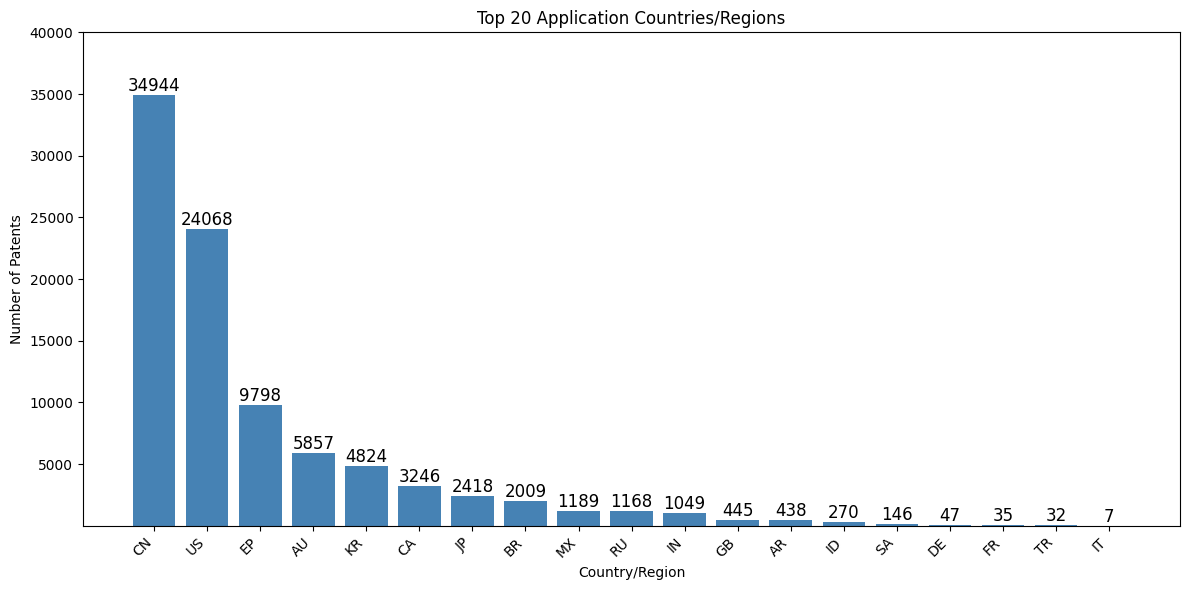

In [230]:
# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_App_countries.index, top_20_App_countries.values, color='steelblue')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), 
             ha='center', va='bottom', rotation=0, fontsize=12)

# Customize the plot
plt.title('Top 20 Application Countries/Regions')
plt.xlabel('Country/Region')
plt.ylabel('Number of Patents')
plt.ylim(10,40000)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()